In [1]:
# These are helpful routines that will assist in building this book. 
# You should run this block before anything else. There is no output expected.
from astrodynamicsbook.bookhelpers import *
loadLatexPreamble()

# This is only here to create the navigation link:
genPrevLink()

$
\def\bs{\boldsymbol}
\def\mf{\mathbf}
\def\mb{\mathbb}
\def\mc{\mathcal}
\def\rfr{\mathcal}
\def\grad{{\rm grad}}
\def\Re{{\rm Re}}
\def\Im{{\rm Im}}
\def\und{\underline}
\def\ovl{\overline}
\def\unb{\underbrace}
\def\Log{\mbox{Log}}
\def\bfomega{\bs \omega}
\def\bfalpha{\bs \alpha}
\def\da{\triangleq}
\newcommand{\leftexp}[2]{{\vphantom{#2}}^{#1}\!{#2}}
\newcommand{\leftsub}[2]{{\vphantom{#2}}_{#1}\!{#2}}
\newcommand{\omegarot}[2]{{\leftexp{\mathcal{#1}}{\boldsymbol{\omega}}^{\mathcal{#2}}}}
\newcommand{\alpharot}[2]{{\leftexp{\mathcal{#1}}{\boldsymbol{\alpha}}^{\mathcal{#2}}}}
\newcommand{\framerot}[2]{{\leftexp{\mathcal{#1}}{C}^{\mathcal{#2}}}}
\newcommand{\dframerot}[2]{{\vphantom{\dot{C}}^{\mathcal{#1}}\!{\dot{C}^{\mathcal{#2}}}}}
\newcommand{\bdot}[1]{\dot{\mathbf{#1}}}
\newcommand{\bhat}[1]{\hat{\mathbf{#1}}}
\newcommand{\mbhat}[1]{\hat{\mathbb{#1}}}
\def\iwb{\omegarot{I}{B}}
\def\iab{\alpharot{I}{B}}
\def\icb{\framerot{I}{B}}
\def\dif{\mathop{}\!\mathrm{d}}
\newcommand{\intd}[1]{\dif#1}
\newcommand{\od}[3][]{{ \frac{\dif{^{#1}}#2}{\dif{#3^{#1}}} }}			
\newcommand{\pd}[3][]{{ \frac{\partial{^{#1}}#2}{\partial{#3^{#1}}} }}	 
\newcommand{\md}[6]{{  \frac{\partial{^{#2}}#1}{\partial{#3^{#4}}\partial{#5^{#6}}} }}
\newcommand{\fddt}[2][]{{  \leftexp{\mathcal{#2}}{\frac{\dif{#1}}{\dif{t}}}  }}
\newcommand{\fdddt}[2][]{{  \leftexp{\mathcal{#2}}{\frac{\dif{^{2}#1}}{\dif{t^2}}}  }}
\newcommand{\ddt}[1][]{\fddt[#1]{I}}
$


# [Previous](<12-Keplers Laws.ipynb>)

# The Perifocal Frame

Recall that the two-body problem is a [central force problem](<08-Angular Momentum.ipynb#Central-Force-Problems>) with two conserved vector quantities: the [specific angular momentum and the eccentricity vector](<11-Gravity.ipynb#Specific-Angular-Momentum>).  All orbital motion occurs in the plane orthogonal to the specific angular momentum, and the eccentricity vector also lies within this plane.  Thus, $\mf e$ and $\mf h$  are orthogonal, and if we introduce a third mutually orthogonal direction $\bhat q \triangleq \bhat h \times \bhat e$ then we can define a hugely useful reference frame:

<div class="alert alert-block alert-info">
    The <b>perifocal frame</b>: 
    $$\mc P = (\bhat{e}, \bhat{q}, \bhat{h})$$
    </div>
    
<div class="alert alert-block alert-danger">
Note how we've omitted any coordinate origin in our frame definition.  This is intentional, so as to avoid much tedious arguing about whether or not the perifocal frame is inertial.  It is.  Two of the defining unit directions are inertially fixed ($\bhat e$ and $\bhat{h}$) which means that the frame has zero angular velocity in any inertial frame.  Some conventions will place the coordinate origin of this frame at the location of the central body of the two-body orbit, and because this point has a non-zero inertial acceleration, this tends to lead to much argument and general brouhaha. And it is all entirely pointless - for our purposes, only the unit directions matter, and these are fixed within any inertial frame, and thus, the perifocal frame is inertial. If you absolutely must assign the perifocal frame a coordinate origin and cannot bear to use the location of the central body, just set it to be the barycenter of the two bodies. Basta!
    </div>

Thanks to [Kepler's first law](<12-Keplers Laws.ipynb#Kepler's-First-Law>) we know that all two-body orbits are conic sections with the central body lying at one focus, and thus we can write the position of the orbiting body (what we've been calling the [orbital radius vector](<11-Gravity.ipynb#The-Two-Body-Problem>) in components of the perifocal frame as:
$$ \mf r = r\cos(\nu) \bhat{e} + r\sin(\nu) \bhat{q}$$

$r$ and $\nu$ are always the polar coordinates of the orbital radius vector in the perifocal frame for any orbit representing any type of conic section.

We can similarly write the orbital velocity vector in components of this frame by directly differentiating the expression above:
$$ \mf v = \fddt{I} \mf r \equiv \fddt{P} \mf r = \left[ \dot r\cos(\nu) - r\dot\nu\sin(\nu)\right]\hat{\mf e} + \left[\dot r\sin(\nu) + r\dot\nu\cos(\nu)\right]\hat{\mf{q}}$$

We can simplify things a bit by solving for $\dot r$ and $\dot \nu$ in terms of other known quantities.  Starting with $\dot r$, we can take the scalar time derivative of the previously derived conic section expression:

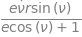

In [27]:
# First we set things up
h,mu,e,nu,nud,t,r,rd = symbols("h,mu,e,nu,nudot,t,r,rdot", real=True, positive=True)
rmag = (h**2/mu)/(1+e*cos(nu))
diffmap = {nu:nud,r:rd}
# Now we differentiate in time
dr = difftotal(rmag,t,diffmap)
# Now we subsitute in the original expression for r
dr = dr.subs(rmag,r)
dr

We thus have:
$$\dot r = r\dot\nu \frac{e \sin{\left(\nu \right)}}{1+ e \cos{\left(\nu \right)}}$$

Next, recalling that $h = \Vert \mf h \Vert = \Vert \mf r \times \mf v \Vert$, we can substitute in the component forms of the orbital radius and velocity vectors to find:

In [28]:
# Remember that component matrices of Euclidean vectors must be 3x1
rvec = Matrix([r*cos(nu),r*sin(nu),0])
vvec = difftotalmat(rvec,t,diffmap)
hvec = rvec.cross(vvec)
hmag = simplify(sqrt(hvec.dot(hvec)))
hmag

We have thus shown that $h = \dot \nu r^2$. Neat!  Plugging all of this back into the orbital velocity vector expression we started from, we have:

In [32]:
simplify(vvec.subs(rd,dr).subs(nud,h/r**2).subs(r,rmag))

⎡  -μ⋅sin(ν)   ⎤
⎢  ──────────  ⎥
⎢      h       ⎥
⎢              ⎥
⎢μ⋅(e + cos(ν))⎥
⎢──────────────⎥
⎢      h       ⎥
⎢              ⎥
⎣      0       ⎦

Summing up, we now have:

<div class="alert alert-block alert-info">
$$ \mf r = r\cos(\nu) \bhat{e} + r\sin(\nu) \bhat{q}$$
$$ \mf v = \frac{\mu}{h}\left[ -\sin(\nu) \bhat{e} + (e + \cos(\nu)) \bhat{q}\right]$$
    $$ h = r^2\dot\nu$$
    </div>

These are *hugely* useful expressions that we'll come back to again and again.